In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1302,2024-05-27,24200,25350,24000,25150,6719200
1303,2024-05-28,25300,26900,24500,26900,9317700
1304,2024-05-29,26900,28450,26900,28300,6449500
1305,2024-05-30,28300,28500,26800,27700,6116600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.8 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0705 - val_loss: 0.0035
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Epoch 66/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.8936e-04 - val_loss: 5.4373e-04
Epoch 67/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4953e-04 - val_loss: 6.0613e-04
Epoch 68/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.0925e-04 - val_loss: 4.6509e-04
Epoch 69/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9724e-04 - val_loss: 4.9098e-04
Epoch 70/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9560e-04 - val_loss: 5.8934e-04
Epoch 71/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.9939e-04 - val_loss: 7.4242e-04
Epoch 72/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2078e-04 - val_loss: 5.0258e-04
Epoch 73/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3133e-04 - val_loss: 5.4505e-04
Epoch 74/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5197e-04 - val_loss: 5.3860e-04
Epoch 75/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5237e-04 - val_loss: 5.4112e-04
Epoch 76/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 813.9722353765537
MAPE: 3.6059373977975366 %
MSLE: 0.002277308290102384


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.13923421 0.1717477  0.16983514 0.15835979 0.15070956 0.15070956
 0.148797   0.15453467 0.148797   0.14497189 0.148797   0.148797
 0.14497189 0.15070956 0.15070956 0.14688444 0.14497189 0.14497189
 0.15070956 0.14688444 0.15070956 0.148797   0.14688444 0.14114677
 0.14114677 0.15262212 0.148797   0.15070956 0.16218491 0.16218491
 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235 0.15644723
 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 

7 day output [[0.68359905]]
8 day input [0.148797   0.14497189 0.148797   0.148797   0.14497189 0.15070956
 0.15070956 0.14688444 0.14497189 0.14497189 0.15070956 0.14688444
 0.15070956 0.148797   0.14688444 0.14114677 0.14114677 0.15262212
 0.148797   0.15070956 0.16218491 0.16218491 0.15835979 0.15644723
 0.15453467 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467
 0.15835979 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304
 0.1851356  0.19087327 0.19469839 0.18704816 0.18131048 0.17557281
 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996

16 day output [[0.63296854]]
17 day input [0.14497189 0.15070956 0.14688444 0.15070956 0.148797   0.14688444
 0.14114677 0.14114677 0.15262212 0.148797   0.15070956 0.16218491
 0.16218491 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235
 0.15644723 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327
 0.17557281 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839
 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304
 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816
 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605 0.29032628
 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163
 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256
 0.33049    0.33240256 0.37830394 0.42611789 0.4528937  0.42420533
 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276
 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.71690816
 0.72547317 0.715156

25 day output [[0.6389443]]
26 day input [0.148797   0.15070956 0.16218491 0.16218491 0.15835979 0.15644723
 0.15453467 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467
 0.15835979 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304
 0.1851356  0.19087327 0.19469839 0.18704816 0.18131048 0.17557281
 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.71690816 0.72547317 0.71515691 0.70536345
 0.70029575 0.69720381 0.69375998 0.68359905 0.68233067 0.67943579
 0.67154849 0.6592934

33 day output [[0.57675314]]
34 day input [0.16027235 0.15644723 0.15453467 0.15453467 0.15835979 0.19087327
 0.19087327 0.17557281 0.1717477  0.18322304 0.1851356  0.19087327
 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356
 0.18322304 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356
 0.18704816 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605
 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186
 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977
 0.33240256 0.33049    0.33240256 0.37830394 0.42611789 0.4528937
 0.42420533 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276
 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.71690816 0.72547317 0.71515691 0.70536345 0.70029575 0.69720381
 0.69375998 0.68359905 0.68233067 0.67943579 0.67154849 0.65929341
 0.64716589 0.64343154 0.641065   0.63509232 0.63296854 0.63707393
 0.63446581 0.63165498 0

41 day output [[0.57071286]]
42 day input [0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.71690816 0.72547317
 0.71515691 0.70536345 0.70029575 0.69720381 0.69375998 0.68359905
 0.68233067 0.67943579 0.67154849 0.65929341 0.64716589 0.64343154
 0.641065   0.63509232 0.63296854 0.63707393 0.63446581 0.63165498
 0.6309737  0.63485056 0.63829541 0.64150321 0.64507008 0.63894433
 0.63765979 0.62665522 0

49 day output [[0.55779654]]
50 day input [0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.71690816 0.72547317 0.71515691 0.70536345
 0.70029575 0.69720381 0.69375998 0.68359905 0.68233067 0.67943579
 0.67154849 0.65929341 0.64716589 0.64343154 0.641065   0.63509232
 0.63296854 0.63707393 0.63446581 0.63165498 0.6309737  0.63485056
 0.63829541 0.64150321 0.64507008 0.63894433 0.63765979 0.62665522
 0.61700302 0.60694295 0.60062778 0.59228134 0.5814485  0.57675314
 0.571123   0.568986

57 day output [[0.5489935]]
58 day input [0.18704816 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605
 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186
 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977
 0.33240256 0.33049    0.33240256 0.37830394 0.42611789 0.4528937
 0.42420533 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276
 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.71690816 0.72547317 0.71515691 0.70536345 0.70029575 0.69720381
 0.69375998 0.68359905 0.68233067 0.67943579 0.67154849 0.65929341
 0.64716589 0.64343154 0.641065   0.63509232 0.63296854 0.63707393
 0.63446581 0.63165498 0.6309737  0.63485056 0.63829541 0.64150321
 0.64507008 0.63894433 0.63765979 0.62665522 0.61700302 0.60694295
 0.60062778 0.59228134 0.5814485  0.57675314 0.571123   0.56898677
 0.5649808  0.56760341 0.56997257 0.57053107 0.57025266 0.57071286
 0.57199347 0.57085842 

65 day output [[0.555157]]
66 day input [0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.71690816 0.72547317
 0.71515691 0.70536345 0.70029575 0.69720381 0.69375998 0.68359905
 0.68233067 0.67943579 0.67154849 0.65929341 0.64716589 0.64343154
 0.641065   0.63509232 0.63296854 0.63707393 0.63446581 0.63165498
 0.6309737  0.63485056 0.63829541 0.64150321 0.64507008 0.63894433
 0.63765979 0.62665522 0.61700302 0.60694295 0.60062778 0.59228134
 0.5814485  0.57675314 0.571123   0.56898677 0.5649808  0.56760341
 0.56997257 0.57053107 0.57025266 0.57071286 0.57199347 0.57085842
 0.57118267 0.56968302 0.56756407 0.56429559 0.56196487 0.55779654
 0.55489773 0.5551284  0.

73 day output [[0.54949087]]
74 day input [0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.71690816 0.72547317 0.71515691 0.70536345
 0.70029575 0.69720381 0.69375998 0.68359905 0.68233067 0.67943579
 0.67154849 0.65929341 0.64716589 0.64343154 0.641065   0.63509232
 0.63296854 0.63707393 0.63446581 0.63165498 0.6309737  0.63485056
 0.63829541 0.64150321 0.64507008 0.63894433 0.63765979 0.62665522
 0.61700302 0.60694295 0.60062778 0.59228134 0.5814485  0.57675314
 0.571123   0.56898677 0.5649808  0.56760341 0.56997257 0.57053107
 0.57025266 0.57071286 0.57199347 0.57085842 0.57118267 0.56968302
 0.56756407 0.56429559 0.56196487 0.55779654 0.55489773 0.5551284
 0.55192518 0.55021876 0.54924887 0.54948837 0.54844731 0.54899353
 0.55003285 0.5501522

82 day output [[0.555153]]
83 day input [0.46628161 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276
 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.71690816
 0.72547317 0.71515691 0.70536345 0.70029575 0.69720381 0.69375998
 0.68359905 0.68233067 0.67943579 0.67154849 0.65929341 0.64716589
 0.64343154 0.641065   0.63509232 0.63296854 0.63707393 0.63446581
 0.63165498 0.6309737  0.63485056 0.63829541 0.64150321 0.64507008
 0.63894433 0.63765979 0.62665522 0.61700302 0.60694295 0.60062778
 0.59228134 0.5814485  0.57675314 0.571123   0.56898677 0.5649808
 0.56760341 0.56997257 0.57053107 0.57025266 0.57071286 0.57199347
 0.57085842 0.57118267 0.56968302 0.56756407 0.56429559 0.56196487
 0.55779654 0.55489773 0.5551284  0.55192518 0.55021876 0.54924887
 0.54948837 0.54844731 0.54899353 0.55003285 0.55015224 0.55052638
 0.55099016 0.55180657 0.55262554 0.55476362 0.55515701 0.55547374
 0.55503958 0.55350763 

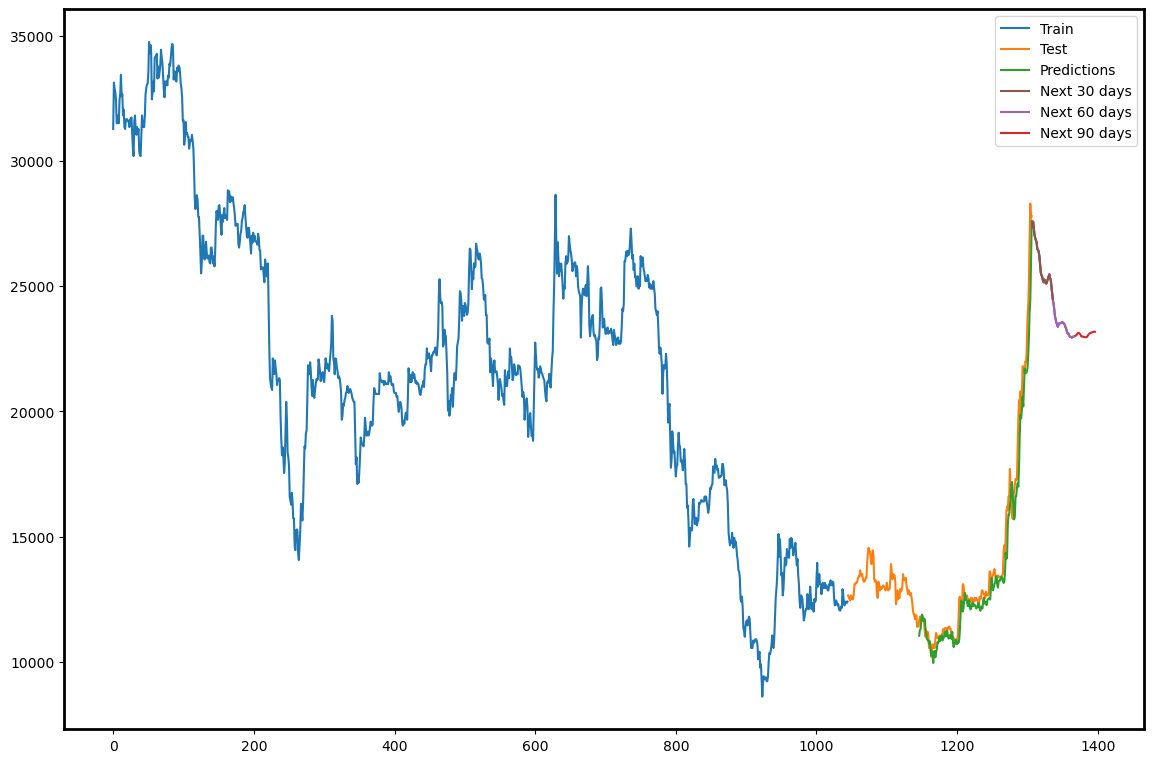

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_HVN_82.png")
plt.show()